#Acetylcholinesterase.drugdicovery
Sec10 and 11


By: Nora Yehia



#Content
**Part 1: Data Acquisition and Preprocessing from ChEMBL**

1.  **Installation:**
    * `! pip install chembl_webresource_client`:  Installs the ChEMBL web resource client, a Python library that allows you to access the ChEMBL database. ChEMBL is a large database of bioactive molecules.

2.  **Import Libraries:**
    * `import pandas as pd`: Imports the pandas library for data manipulation (like creating tables).
    * `from chembl_webresource_client.new_client import new_client`: Imports the ChEMBL client to interact with the database.

3.  **Target Search:**
    * `target = new_client.target`:  Creates a target object to search for biological targets.
    * `target_query = target.search('acetylcholinesterase')`:  Searches the ChEMBL database for targets related to 'acetylcholinesterase' (the enzyme we're interested in).
    * `targets = pd.DataFrame.from_dict(target_query)`:  Converts the search results into a pandas DataFrame, making it easier to work with.
    * `targets`:  Displays the search results (the matching targets).

4.  **Target Selection:**
    * `selected_target = targets.target_chembl_id[0]`:  Selects the ChEMBL ID of the first acetylcholinesterase target found.
    * `selected_target`:  Displays the selected target's ChEMBL ID.

5.  **Activity Retrieval:**
    * `activity = new_client.activity`: Creates an activity object to search for bioactivity data.
    * `res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")`:  Retrieves bioactivity data (specifically IC50 values) for compounds tested against the selected acetylcholinesterase target. IC50 is a measure of how effectively a compound inhibits the enzyme.

6.  **Data Organization:**
    * `df = pd.DataFrame.from_dict(res)`:  Converts the retrieved activity data into a pandas DataFrame.
    * `df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)`: Saves the raw data to a CSV file.

7.  **Data Cleaning:**
    * `df2 = df[df.standard_value.notna()]`:  Removes entries with missing 'standard_value' (IC50) data.
    * `df2 = df2[df.canonical_smiles.notna()]`:  Removes entries with missing 'canonical_smiles' (a standardized representation of the molecule's structure) data.
    * `df2`:  Displays the cleaned data.

8.  **Uniqueness Check:**
    * `len(df2.canonical_smiles.unique())`:  Counts the number of unique molecules (based on their SMILES representation) in the dataset.

9.  **Duplicate Removal:**
    * `df2_nr = df2.drop_duplicates(['canonical_smiles'])`:  Removes duplicate entries based on the 'canonical_smiles' column, keeping only one entry per unique molecule.
    * `df2_nr`:  Displays the data with duplicates removed.

10. **Data Selection:**
    * `selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']`:  Defines a list of columns to keep: molecule ID, SMILES representation, and IC50 value.
    * `df3 = df2_nr[selection]`:  Creates a new DataFrame containing only the selected columns.
    * `df3`:  Displays the selected data.

11. **Save Preprocessed Data:**
    * `df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)`:  Saves the preprocessed data to a CSV file.

12. **Bioactivity Classification:**
    * `df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')`:  Reads the preprocessed data from the CSV file.
    * The `for` loop and `bioactivity_threshold`:  This is a crucial step. It classifies the molecules into three categories based on their IC50 values:
        * 'active':  IC50 <= 1000 (nM) -  These compounds are considered potent inhibitors.
        * 'inactive': IC50 >= 10000 (nM) - These compounds are considered weak inhibitors.
        * 'intermediate': 1000 < IC50 < 10000 (nM) - Compounds with moderate inhibitory activity.
    * `bioactivity_class = pd.Series(bioactivity_threshold, name='class')`:  Creates a pandas Series (a single column) containing the bioactivity classifications.
    * `df5 = pd.concat([df4, bioactivity_class], axis=1)`:  Adds the 'class' column to the DataFrame.
    * `df5`:  Displays the DataFrame with bioactivity classes.
    * `df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)`:  Saves the curated data to a CSV file.

13. **Data Archiving:**
    * `! zip acetylcholinesterase.zip *.csv`:  Compresses all CSV files into a zip archive.
    * `! ls -l`:  Lists the files in the current directory.

**Part 2: Environment Setup and Library Installation**

1.  **Miniconda Installation (for RDKit):**
    * `! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh`:  Downloads Miniconda, a package manager, which helps in installing RDKit.
    * `! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh`:  Makes the Miniconda installer executable.
    * `! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local`:  Installs Miniconda in the `/usr/local` directory.
    * `! conda install -c rdkit rdkit -y`:  Uses Conda to install RDKit, a cheminformatics toolkit, which is essential for molecular analysis.
    * `import sys`, `sys.path.append('/usr/local/lib/python3.7/site-packages/')`:  Adds the RDKit installation path to Python's system path, making it importable.

2.  **Download Curated Data:**
    * `! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv`:  Downloads the curated bioactivity data (from the previous steps) from a GitHub repository.

**Part 3: Data Preparation for Descriptor Calculation**

1.  **Load Data:**
    * `import pandas as pd`, `df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')`, `df`:  Loads the curated data into a pandas DataFrame.

2.  **Isolate SMILES:**
    * `df_no_smiles = df.drop(columns='canonical_smiles')`:  Creates a copy of the DataFrame without the 'canonical_smiles' column.  SMILES is the textual representation of a molecule.
    * The `for` loop to process SMILES:  This loop processes the `canonical_smiles` column.  Sometimes a compound might be represented as multiple SMILES strings (e.g., if it has multiple components). This loop selects the longest SMILES string for each compound, assuming it's the primary component.
    * `smiles = pd.Series(smiles, name='canonical_smiles')`:  Creates a pandas Series from the processed SMILES strings.
    * `df_clean_smiles = pd.concat([df_no_smiles, smiles], axis=1)`, `df_clean_smiles`:  Combines the DataFrame without SMILES with the cleaned SMILES strings.

**Part 4: Lipinski Descriptor Calculation**

1.  **RDKit Setup:**
    * `!pip install -q rdkit-pypi`:  Installs RDKit (if it wasn't installed earlier).  The `-q` makes it quiet (less output).
    * `import rdkit`, `from rdkit import Chem`, `from rdkit.Chem import Descriptors, Lipinski`, `print(...)`:  Imports RDKit modules and prints the RDKit version, verifying the installation.

2.  **Lipinski Function:**
    * The `lipinski` function:  This function calculates the Lipinski's Rule of Five descriptors for each molecule. These rules are a set of guidelines to predict the oral bioavailability of a drug. The descriptors calculated are:
        * `MW`: Molecular Weight
        * `LogP`:  Partition coefficient (a measure of lipophilicity)
        * `NumHDonors`: Number of hydrogen bond donors
        * `NumHAcceptors`: Number of hydrogen bond acceptors
    * The function takes a list of SMILES strings as input and returns a pandas DataFrame containing the calculated descriptors.

3.  **Calculate Lipinski Descriptors:**
    * `df_lipinski = lipinski(df_clean_smiles.canonical_smiles)`, `df_lipinski`:  Calculates the Lipinski descriptors for the molecules in the dataset.

4.  **Combine DataFrames:**
    * `df_combined = pd.concat([df, df_lipinski], axis=1)`, `df_combined`:  Combines the original DataFrame with the calculated Lipinski descriptors.

**Part 5: pIC50 Calculation**

1.  **pIC50 Function:**
    * The `pIC50` function:  Converts IC50 values to pIC50 values. pIC50 is the negative logarithm (base 10) of the IC50 value (in molar units).  It's a more convenient scale for comparing the potency of compounds (higher pIC50 means greater potency).  The function assumes the IC50 values are in nM and converts them to M before calculating pIC50.

2.  **Explore IC50 Values:**
    * `df_combined.standard_value.describe()`:  Provides descriptive statistics of the IC50 values.
    * The `-np.log10(...)` calculations:  Show examples of how IC50 values are converted to pIC50.

3.  **IC50 Normalization Function:**
    * The `norm_value` function:  This function normalizes very high IC50 values.  It caps any IC50 value greater than 100,000,000 nM to 100,000,000 nM. This is often done to reduce the influence of extreme outliers.

4.  **Normalize IC50 Values:**
    * `df_norm = norm_value(df_combined)`, `df_norm.standard_value_norm.describe()`:  Applies the normalization function and displays descriptive statistics of the normalized IC50 values.

5.  **Calculate pIC50:**
    * `df_final = pIC50(df_norm)`, `df_final.pIC50.describe()`:  Calculates the pIC50 values from the normalized IC50 values and displays descriptive statistics.

6.  **Save Data with pIC50:**
    * `df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')`:  Saves the DataFrame with pIC50 values to a CSV file.

7.  **Create 2-Class Dataset:**
    * `df_2class = df_final[df_final['class'] != 'intermediate']`:  Creates a new DataFrame containing only 'active' and 'inactive' compounds (removes the 'intermediate' class). This is often done for binary classification tasks.
    * `df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')`:  Saves the 2-class DataFrame to a CSV file.

**Part 6: Exploratory Data Analysis (EDA) and Visualization**

1.  **Import Libraries:**
    * `import seaborn as sns`, `sns.set(style='ticks')`, `import matplotlib.pyplot as plt`:  Imports libraries for data visualization.

2.  **Bioactivity Class Distribution:**
    * `plt.figure(figsize=(5.5, 5.5))`:  Sets the figure size.
    * `sns.countplot(x='class', data=df_2class, edgecolor='black')`:  Creates a count plot showing the number of compounds in each bioactivity class ('active' and 'inactive').
    * `plt.xlabel(...)`, `plt.ylabel(...)`:  Sets the plot labels.
    * `plt.savefig('plot_bioactivity_class.pdf')`:  Saves the plot to a PDF file.

3.  **Molecular Weight vs. LogP Plot:**
    * `plt.figure(figsize=(5.5, 5.5))`:  Sets the figure size.
    * `sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)`:  Creates a scatter plot showing the relationship between Molecular Weight (MW) and LogP.  The color represents the bioactivity class, and the size of the points represents the pIC50 value.
    * `plt.xlabel(...)`, `plt.ylabel(...)`, `plt.legend(...)`:  Sets the plot labels and legend.
    * `plt.savefig('plot_MW_vs_LogP.pdf')`:  Saves the plot.

4.  **pIC50 Distribution by Class:**
    * `plt.figure(figsize=(5.5, 5.5))`:  Sets the figure size.
    * `sns.boxplot(x='class', y='pIC50', data=df_2class)`:  Creates a box plot showing the distribution of pIC50 values for each bioactivity class.
    * `plt.xlabel(...)`, `plt.ylabel(...)`:  Sets the plot labels.
    * `plt.savefig('plot_ic50.pdf')`:  Saves the plot.

5.  **Mann-Whitney U Test Function:**
    * The `mannwhitney` function:  Performs the Mann-Whitney U test, a non-parametric statistical test, to compare the distributions of a descriptor (e.g., pIC50, MW, LogP) between the 'active' and 'inactive' classes.  It helps to determine if the observed differences in these properties between the two classes are statistically significant.
    * It takes a descriptor name as input and returns a DataFrame with the test results (statistics, p-value, interpretation).

6.  **Perform Mann-Whitney U Tests:**
    * `mannwhitney('pIC50')`, `mannwhitney('MW')`, `mannwhitney('LogP')`, `mannwhitney('NumHDonors')`, `mannwhitney('NumHAcceptors')`:  Calls the `mannwhitney` function to perform the tests for pIC50, MW, LogP, number of hydrogen bond donors, and number of hydrogen bond acceptors.
    * The code also generates and saves box plots for MW, LogP, NumHDonors, and NumHAcceptors.

7.  **Archive Results:**
    * `! zip -r results.zip . -i *.csv *.pdf`:  Compresses all CSV and PDF files in the current directory into a zip archive named `results.zip`.

**Part 7: Molecular Descriptor Generation (PaDEL-Descriptor)**

1.  **Download PaDEL-Descriptor:**
    * `! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip`, `! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh`:  Downloads PaDEL-Descriptor (a tool for calculating molecular descriptors) and a shell script to run it.

2.  **Unzip PaDEL-Descriptor:**
    * `! unzip padel.zip`:  Extracts the contents of the PaDEL-Descriptor zip file.

3.  **Download pIC50 Data:**
    * `! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv`:  Downloads the DataFrame with pIC50 values.

4.  **Load Data:**
    * `import pandas as pd`, `df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')`, `df3`:  Loads the pIC50 data.

5.  **Prepare Input for PaDEL:**
    * `selection = ['canonical_smiles', 'molecule_chembl_id']`, `df3_selection = df3[selection]`:  Selects the SMILES and molecule ID columns.
    * `df3_selection.to_csv

##Lets start coding

In [ ]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.0 MB/s eta 0:00:00


In [ ]:

# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

cross_references (مراجع متقاطعة): هذا العمود يحتوي على معرفات أو روابط لقواعد بيانات أو مصادر أخرى ذات صلة بالبروتين المستهدف. تشير علامة [] إلى أنه لا توجد مراجع متقاطعة لهذه الإدخالات المحددة.

organism (الكائن الحي): يحدد هذا العمود الاسم العلمي للكائن الحي الذي ينتمي إليه البروتين المستهدف. على سبيل المثال، "Drosophila melanogaster" هي ذبابة الفاكهة، و "Homo sapiens" هو الإنسان.

pref_name (الاسم المفضل): يقدم هذا العمود اسمًا مفضلًا أو شائعًا للبروتين المستهدف. على سبيل المثال، "Acetylcholinesterase" هو إنزيم معروف جيدًا.

scores (النتائج/التقييمات): يحتوي هذا العمود على نتائج رقمية، من المحتمل أن تمثل مستوى ثقة، أو مقياس تشابه، أو قيمة كمية أخرى مرتبطة بالهدف. كلما كانت النتيجة أعلى (مثل 18.0)، زادت قوة أو أهمية الارتباط المحتمل.

species_group_flag (علم مجموعة الأنواع): هذا علم منطقي (صواب/خطأ). تشير كلمة "False" في هذا السياق إلى أن الهدف خاص بالكائن الحي المدرج ولا يعتبر جزءًا من مجموعة أنواع أوسع لهذا الإدخال المحدد.

target_chembl_id (معرف الهدف في شمبل): يوفر هذا العمود معرفًا فريدًا للبروتين المستهدف داخل قاعدة بيانات شمبل (ChEMBL)، وهي مجموعة كبيرة من الجزيئات النشطة بيولوجيًا وأهدافها. تتبع المعرفات التنسيق "CHEMBL" متبوعًا برقم.

target_components (مكونات الهدف): يحتوي هذا العمود على قائمة من القواميس، يصف كل منها مكونًا من مكونات الهدف. في معظم الحالات هنا، يوجد مكون واحد. يتضمن القاموس:
'accession' (رقم الانضمام): رقم الانضمام إلى UniProt، وهو معرف فريد لتسلسل البروتين في قاعدة بيانات UniProt.

'component_description' (وصف المكون): وصف موجز لمكون البروتين، غالبًا ما يتضمن الأشكال المتماثلة أو الوحدات الفرعية.

'component_type' (نوع المكون): يشير إلى ما إذا كان المكون بروتينًا مفردًا، أو مركبًا بروتينيًا، أو جزءًا من مجموعة أكبر.

target_type (نوع الهدف): يحدد هذا العمود النوع العام للهدف، مثل "SINGLE PROTEIN" (بروتين مفرد) أو "SELECTIVITY GROUP" (مجموعة انتقائية) مما يشير إلى هدف يمكن أن يتفاعل مع العديد من البروتينات داخل عائلة.

tax_id (معرف التصنيف): يوفر هذا العمود معرف التصنيف الخاص بـ NCBI، وهو معرف رقمي للنوع في قاعدة بيانات التصنيف الخاصة بـ NCBI (المركز الوطني لمعلومات التكنولوجيا الحيوية). على سبيل المثال، 9606 هو معرف التصنيف الخاص بالإنسان العاقل.

In [ ]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.0,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


In [ ]:

selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL2242744'

هنا 1standerd type ...انواع مختلفه  بس  هنختار ic50

2 عمود اخر standard value لها ده اقلي كنا دو آفضل

In [ ]:

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)

In [ ]:

df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12438748,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.83
1,None,None,12438749,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,112.72
2,None,None,12438750,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,37.5
3,None,None,12438751,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,4.5
4,None,None,12438752,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.84
5,None,None,12438753,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,3.81
6,None,None,12438754,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,12.34
7,None,None,12438755,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,9.92
8,None,None,12438756,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,8.29
9,None,None,12438757,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.76


#٢

٢نعمل preprocessing  على اعمده

الى محتاجنها فقط  تمام

In [ ]:
len(df2.canonical_smiles.unique())

18

In [ ]:

df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,12438748,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.83
1,None,None,12438749,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,112.72
2,None,None,12438750,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,37.5
3,None,None,12438751,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,4.5
4,None,None,12438752,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.84
5,None,None,12438753,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,3.81
6,None,None,12438754,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,12.34
7,None,None,12438755,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,9.92
8,None,None,12438756,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,8.29
9,None,None,12438757,[],CHEMBL3068296,Inhibition of acetylcholinesterase in Drosophi...,B,None,None,BAO_0000190,...,Drosophila melanogaster,Acetylcholinesterase,7227,None,None,IC50,uM,UO_0000065,None,1.76


In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0


In [ ]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

#٣


بعد حددنا اعمده عايزنها  نعمل داله تلف علي
standerd value
ونعطى رنج قيم من كذا لكذا دوا كويس وده من علم دكتور مرض

In [ ]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:ق
    bioactivity_threshold.append("intermediate")

#٤
نضيف علي اعمده المختارهه فايل سابق عمود كلاس ناتج من خطوه سابقه  وده يبقي  

In [ ]:

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


In [ ]:
df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip acetylcholinesterase.zip *.csv

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 85%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 75%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 76%)


In [ ]:

! ls -l

total 28
-rw-r--r-- 1 root root 9828 Apr 26 09:11 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root 1093 Apr 26 09:11 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root 1303 Apr 26 09:11 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 2772 Apr 26 09:11 acetylcholinesterase.zip
drwxr-xr-x 1 root root 4096 Apr 24 18:20 sample_data


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:

! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-04-26 09:17:03--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   202MB/s    in 0.4s    

2025-04-26 09:17:04 (202 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2025-04-26 09:18:57--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.03s   

2025-04-26 09:18:57 (13.0 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’ saved [385924/385924]



،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،،

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate


#٥
  هنا بقي  هنشيل عمود  وبعدين نعمل عليه شويه تحسين

In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:

smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL463210,1830.0,intermediate,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl
1,CHEMBL2252723,112720.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O
2,CHEMBL2252722,37500.0,inactive,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O
3,CHEMBL2252721,4500.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O
4,CHEMBL2252851,1840.0,intermediate,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O
5,CHEMBL2252850,3810.0,intermediate,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O
6,CHEMBL2252849,12340.0,inactive,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O
7,CHEMBL2252848,9920.0,intermediate,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O
8,CHEMBL2252847,8290.0,intermediate,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O
9,CHEMBL2252846,1760.0,intermediate,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC


In [ ]:
!pip install -q rdkit-pypi
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
print(f"RDKit version: {rdkit.__version__}")
print("RDKit imported successfully!")

     |████████████████████████████████| 29.2 MB 1.3 MB/s 


RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RuntimeError: module compiled against ABI version 0x1000009 but this version of numpy is 0x2000000

RDKit version: 2022.09.5
RDKit imported successfully!


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


This function below is designed to calculate Lipinski's Rule of Five descriptors for a set of molecules. These descriptors are used in drug discovery to estimate how likely a molecule is to be orally bioavailable (meaning it can be absorbed and used by the body when taken as a pill).

How it Works
Input:
The function takes a list (or pandas Series) of smiles strings as input.
A SMILES string is a way to represent a molecule's structure as text (e.g., "CC(=O)Oc1ccccc1C(=O)O" for aspirin).
def lipinski(smiles, verbose=False):
    # ... (rest of the function code)
Use code with caution
Creating Molecule Objects:
It first converts each SMILES string into an RDKit molecule object (mol) using Chem.MolFromSmiles(elem). These objects are stored in a list called moldata. RDKit is a library used for cheminformatics (working with chemical data).
moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)
Use code with caution
Calculating Descriptors:
It then iterates through each molecule object in moldata and calculates the following Lipinski descriptors:
desc_MolWt: Molecular weight of the molecule.
desc_MolLogP: Octanol-water partition coefficient (LogP), a measure of the molecule's lipophilicity (how well it dissolves in fats versus water).
desc_NumHDonors: Number of hydrogen bond donors in the molecule.
desc_NumHAcceptors: Number of hydrogen bond acceptors in the molecule.
for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
Use code with caution
Storing Descriptors:
The calculated descriptors are stored in a NumPy array called row.
These row arrays are stacked vertically using np.vstack to create a matrix (baseData) containing all the descriptors for all the molecules.
row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
Use code with caution
Creating a DataFrame:
Finally, the baseData matrix is converted into a pandas DataFrame called descriptors, with appropriate column names ("MW", "LogP", "NumHDonors", "NumHAcceptors").
columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
Use code with caution
Output:
The function returns the descriptors DataFrame, which contains the calculated Lipinski descriptors for each input molecule.
return descriptors
Use code with caution
In Summary
The lipinski function takes SMILES strings representing molecules, calculates important chemical properties (Lipinski descriptors) using RDKit, and organizes these properties into a convenient pandas DataFrame for further analysis in a drug discovery workflow


#٦
بحث داله بتعطى  اربع نواتج  بنعرف جوده تاثير دوا

In [ ]:

# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


In [ ]:

df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,350.591,4.7181,0.0,5.0
1,455.557,6.3177,0.0,6.0
2,441.530,5.9276,0.0,6.0
3,427.503,5.5375,0.0,6.0
4,413.476,5.1474,0.0,6.0
5,399.449,4.7573,0.0,6.0
6,385.422,4.3672,0.0,6.0
7,371.395,3.9771,0.0,6.0
8,357.368,3.5870,0.0,6.0
9,478.594,7.9358,0.0,8.0


#7
بعد ما خلصت بقي وجبت ناتج من داله السابقه احطه في  مع  داتا سابق شغالين عليهاا

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,1830.0,intermediate,350.591,4.7181,0.0,5.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,112720.0,inactive,455.557,6.3177,0.0,6.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,37500.0,inactive,441.530,5.9276,0.0,6.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,4500.0,intermediate,427.503,5.5375,0.0,6.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,1840.0,intermediate,413.476,5.1474,0.0,6.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,3810.0,intermediate,399.449,4.7573,0.0,6.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,12340.0,inactive,385.422,4.3672,0.0,6.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,9920.0,intermediate,371.395,3.9771,0.0,6.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,8290.0,intermediate,357.368,3.5870,0.0,6.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,1760.0,intermediate,478.594,7.9358,0.0,8.0


#٨
 هنا بقي  هنعمل ايه  هنحول وسييله الى بنقيس بيها ic50 to pc50

In [ ]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,1.800000e+01
mean,2.235217e+06
std,9.424884e+06
min,8.700000e+02
25%,1.832500e+03
50%,6.455000e+03
75%,1.180500e+04
max,4.000000e+07


In [ ]:
-np.log10( (10**-9)* 100000000 )

-np.log10( (10**-9)* 10000000000 )

np.float64(-1.0)

#9
normalization  starder value  علشان نفس رنج

In [ ]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
    input['standard_value_norm'] = norm
    # Corrected line:
    x = input.drop('standard_value', axis=1)
    return x

df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,1830.0
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,112720.0
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,37500.0
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,4500.0
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,1840.0
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,3810.0
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,12340.0
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,9920.0
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,8290.0
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,1760.0


In [ ]:

df_norm.standard_value_norm.describe()

,standard_value_norm
count,1.800000e+01
mean,2.235217e+06
std,9.424884e+06
min,8.700000e+02
25%,1.832500e+03
50%,6.455000e+03
75%,1.180500e+04
max,4.000000e+07


In [ ]:
def pIC50(input):
    import numpy as np
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Convert nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    # Corrected line:
    x = input.drop(columns=['standard_value_norm'])
    return x

df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,5.737549
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,5.346787
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,5.735182
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,5.419075
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,5.003488
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,5.081445
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,5.754487


#10

هنحسب علي normalizatin df بقيي



In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,5.737549
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,5.346787
4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,5.735182
5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,5.419075
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,5.003488
8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,5.081445
9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,5.754487


In [ ]:
df_final.pIC50.describe()

,pIC50
count,18.000000
mean,5.042071
std,1.054814
min,1.397940
25%,4.929364
50%,5.204141
75%,5.736957
max,6.060481


In [ ]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:

df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
12,CHEMBL2252843,CCOP(=O)(OCC)SCCCCCCCSP(=O)(OCC)OCC,inactive,436.513,6.7655,0.0,8.0,4.991400
13,CHEMBL2252842,CCOP(=O)(OCC)SCCCCCCSP(=O)(OCC)OCC,active,422.486,6.3754,0.0,8.0,6.060481
14,CHEMBL2252841,CCOP(=O)(OCC)SCCCCCSP(=O)(OCC)OCC,inactive,408.459,5.9853,0.0,8.0,4.908685
17,CHEMBL1232328,CCOP(O)(=S)OCC,inactive,170.170,1.2762,1.0,3.0,1.397940


In [ ]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

#١١ EDAVisulize
هنعمل تحليل كده visualize نفهم اكتر نتاج سابقه بشكل صور

In [ ]:

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

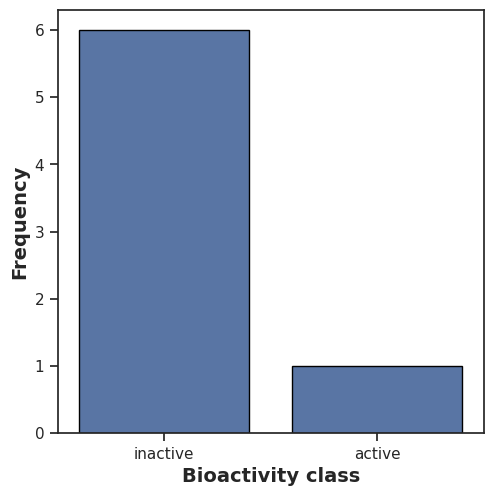

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

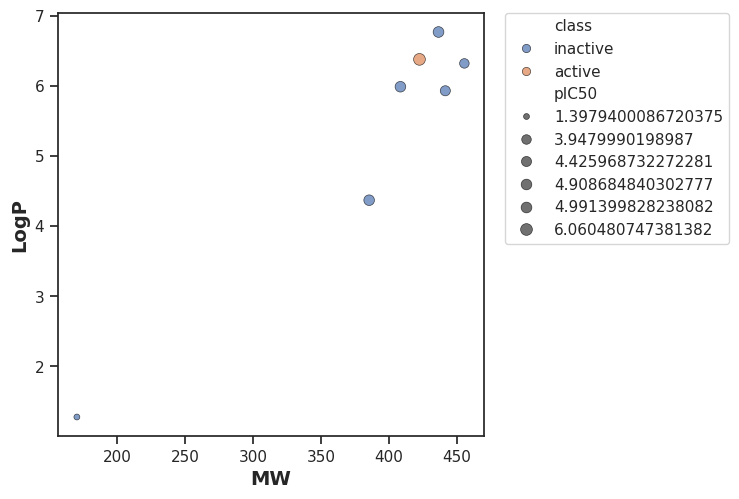

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

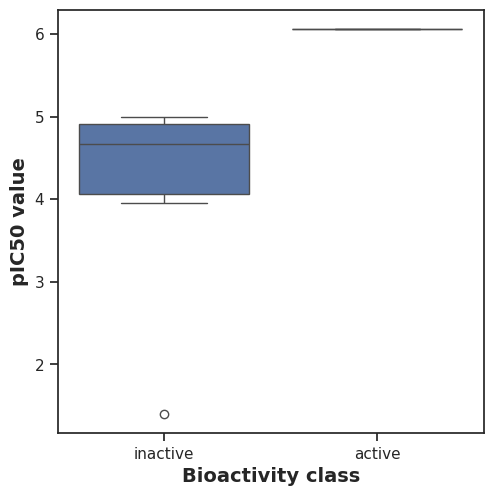

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#١٢



This function is designed to perform a statistical test called the Mann-Whitney U test. This test is used to determine if there's a significant difference between two groups of data. In this specific context, it's used to see if there's a statistically significant difference in the distribution of a specific molecular descriptor (like molecular weight or lipophilicity) between active and inactive compounds.

How it Works
Import Necessary Libraries:
from numpy.random import seed
   from numpy.random import randn
   from scipy.stats import mannwhitneyu
Use code with caution
seed: Used to set the random number generator for reproducibility of results.
randn: Not actually used in this function, might be a leftover from initial development or for potential future use..
mannwhitneyu: The core function from the scipy.stats module that performs the Mann-Whitney U test.
Set Random Seed:
seed(1)
Use code with caution
Ensures consistent results each time the code is run.
Prepare Data for the Test:
selection = [descriptor, 'class']
   df = df_2class[selection]
   active = df[df['class'] == 'active']
   active = active[descriptor]

   selection = [descriptor, 'class']
   df = df_2class[selection]
   inactive = df[df['class'] == 'inactive']
   inactive = inactive[descriptor]
Use code with caution
selection: A list containing the name of the descriptor to be tested and the 'class' column (which indicates whether a compound is 'active' or 'inactive').
df: A subset of the df_2class DataFrame containing only the selected columns.
active: A pandas Series containing the values of the descriptor for all 'active' compounds.
inactive: A pandas Series containing the values of the descriptor for all 'inactive' compounds.
Perform the Mann-Whitney U Test:
stat, p = mannwhitneyu(active, inactive)
Use code with caution
mannwhitneyu: Applies the test to the active and inactive data.
stat: The U statistic calculated by the test.
p: The p-value, representing the probability of observing the data if there were no difference between the groups.
Interpret the Results:
alpha = 0.05
   if p > alpha:
     interpretation = 'Same distribution (fail to reject H0)'
   else:
     interpretation = 'Different distribution (reject H0)'
Use code with caution
alpha: The significance level (commonly set to 0.05).
If the p-value is greater than alpha, it means there is not enough evidence to conclude that the distributions are different.
If the p-value is less than or equal to alpha, it suggests a significant difference between the distributions.
Create and Save Results:
results = pd.DataFrame({'Descriptor':descriptor,
                           'Statistics':stat,
                           'p':p,
                           'alpha':alpha,
                           'Interpretation':interpretation}, index=[0])
   filename = 'mannwhitneyu_' + descriptor + '.csv'
   results.to_csv(filename)
Use code with caution
The results are organized into a pandas DataFrame.
The DataFrame is saved to a CSV file with a descriptive filename.
Return Results:
return results
Use code with caution
The function returns the DataFrame containing the test results.


In [ ]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

#١٣
 visulization لكل واحد جربت داله  عليه داله
 ic50,M w

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,6.0,0.207196,0.05,Same distribution (fail to reject H0)


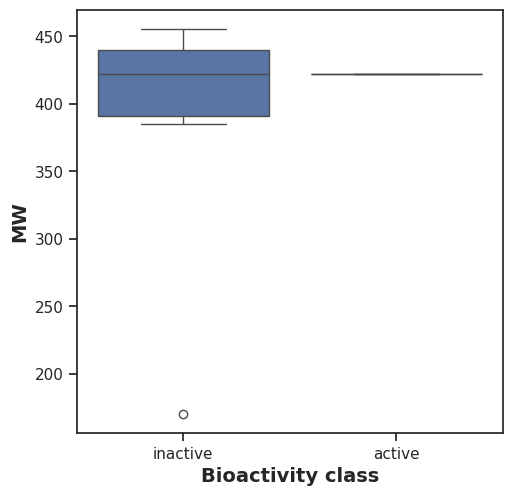

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3.0,1.0,0.05,Same distribution (fail to reject H0)


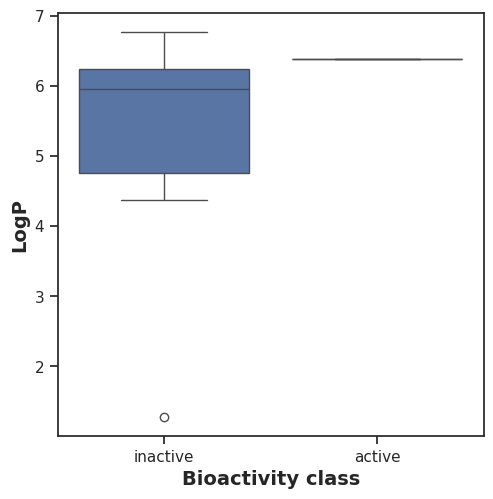

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5.0,0.571429,0.05,Same distribution (fail to reject H0)


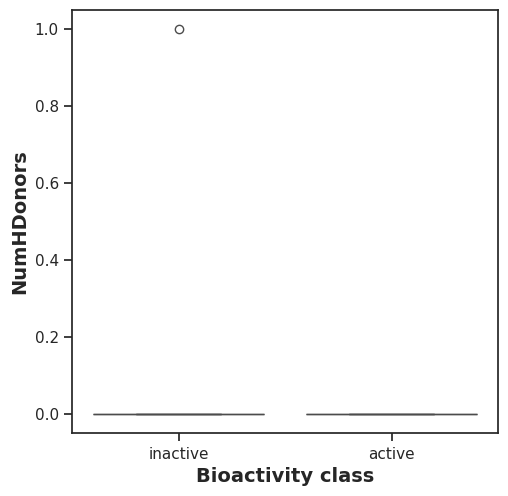

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.5,1.0,0.05,Same distribution (fail to reject H0)


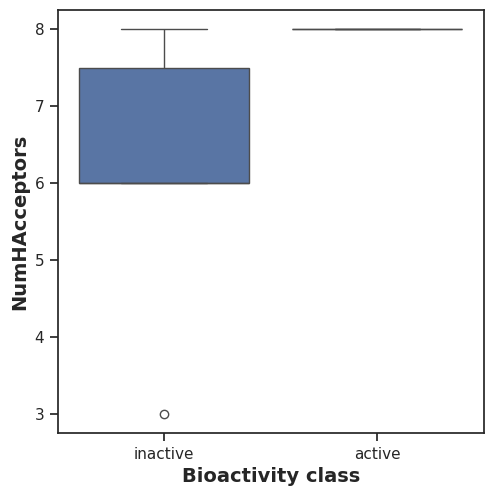

In [ ]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:

mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5.0,0.417887,0.05,Same distribution (fail to reject H0)


In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 76%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 75%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 60%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 68%)
  adding: plot_MW.pdf (deflated 39%)
  adding: mannwhitneyu_MW.csv (deflated 6%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 31%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 85%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:

! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2025-04-26 10:16:01--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2025-04-26 10:16:01--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2025-04-26 10:16:02 (177 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2025-04-26 10:16:02--  https://github

In [ ]:

! unzip padel.zip


Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

--2025-04-26 10:16:07--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 655414 (640K) [text/plain]
Saving to: ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1’

acetylcholinesteras 100%[===================>] 640.05K  --.-KB/s    in 0.04s   

2025-04-26 10:16:08 (17.0 MB/s) - ‘acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1’ saved [655414/655414]



#١٤
بعد ماحفظت بياتات سابقه اقرءاها من مسار تانى لو وقفت runs

In [ ]:

import pandas as pd

In [ ]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL463210,CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl,intermediate,350.591,4.7181,0.0,5.0,5.737549
1,1,CHEMBL2252723,CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,455.557,6.3177,0.0,6.0,3.947999
2,2,CHEMBL2252722,CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O,inactive,441.530,5.9276,0.0,6.0,4.425969
3,3,CHEMBL2252721,CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,427.503,5.5375,0.0,6.0,5.346787
4,4,CHEMBL2252851,CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,413.476,5.1474,0.0,6.0,5.735182
5,5,CHEMBL2252850,CCOP(=O)(OCC)SCCCCCCN1C(=O)c2ccccc2C1=O,intermediate,399.449,4.7573,0.0,6.0,5.419075
6,6,CHEMBL2252849,CCOP(=O)(OCC)SCCCCCN1C(=O)c2ccccc2C1=O,inactive,385.422,4.3672,0.0,6.0,4.908685
7,7,CHEMBL2252848,CCOP(=O)(OCC)SCCCCN1C(=O)c2ccccc2C1=O,intermediate,371.395,3.9771,0.0,6.0,5.003488
8,8,CHEMBL2252847,CCOP(=O)(OCC)SCCCN1C(=O)c2ccccc2C1=O,intermediate,357.368,3.5870,0.0,6.0,5.081445
9,9,CHEMBL2252846,CCOP(=O)(OCC)SCCCCCCCCCCSP(=O)(OCC)OCC,intermediate,478.594,7.9358,0.0,8.0,5.754487


هنا هناخد عمودين مهمين معنا في حسابات قادمه ونحطهم في فايل csv

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:

! cat molecule.smi | head -5

CCOP(=S)(OCC)Oc1nc(Cl)c(Cl)cc1Cl	CHEMBL463210
CCOP(=O)(OCC)SCCCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252723
CCOP(=O)(OCC)SCCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252722
CCOP(=O)(OCC)SCCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252721
CCOP(=O)(OCC)SCCCCCCCN1C(=O)c2ccccc2C1=O	CHEMBL2252851


In [ ]:

! cat molecule.smi | wc -l

18




Understanding Shell Commands in Jupyter Notebooks
First, it's important to understand that Jupyter notebooks allow you to run shell commands (commands you'd typically run in a terminal) by prefixing them with an exclamation mark (!).

The cat Command
cat is a standard Linux/Unix command that stands for "concatenate". Its primary function is to display the contents of a file.

Putting it Together: ! cat padel.sh
Therefore, ! cat padel.sh does the following:

!: Tells the Jupyter notebook to execute this line as a shell command.

cat: Invokes the cat command.

padel.sh: Specifies the file that cat should operate on.

padel.sh is a shell script (a set of commands

that was downloaded earlier in the workflow. This script is used to run the PaDEL-Descriptor software, which calculates molecular descriptors.

#part5 modeling

اللي عملتيه ده يعتبر جزء أساسي من شغل **اكتشاف وتطوير الأدوية (Drug Discovery and Development)** باستخدام الحاسوب والذكاء الاصطناعي. تعالي نفصلها ونشوف كل خطوة مهمة إزاي:

1.  **`! cat padel.sh`:**
    * زي ما فهمتي، ده عشان تشوفي محتوى ملف اسمه `padel.sh`.
    * **الفائدة هنا:** بتتأكدي إن السكريبت ده موجود، وإن الأوامر اللي جواه هي اللي هتشغل برنامج PaDEL-Descriptor زي ما إنتي عايزة. مهم تتأكدي إن البرنامج هيشتغل صح وياخد المدخلات اللي محتاجاها.

2.  **تشغيل سكريبت `padel.sh` (اللي بيشغل برنامج PaDEL-Descriptor):**
    * برنامج PaDEL-Descriptor بيعمل حاجة مهمة جدًا، وهي **حساب "موصوفات جزيئية" (Molecular Descriptors)** للمركبات الكيميائية اللي عندك.
    * **إيه هي الموصوفات الجزيئية دي؟** تخيلي إنك بتوصفي شكل ومواصفات كل مركب كيميائي بأرقام ورموز. دي بتبقى معلومات رياضية وكميائية عن التركيب الذري، الروابط، الشحنات، والشكل ثلاثي الأبعاد للجزيء.
    * **الفائدة هنا:** بتحولي المركبات الكيميائية من مجرد هياكل لبيانات رقمية يقدر يفهمها نموذج تعلم الآلة (ML model) اللي هتعمليه بعد كده.

3.  **عمل نموذج تعلم آلة (ML model) للتنبؤ بقيمة IC50:**
    * بعد ما حسبتي الموصوفات الجزيئية لكل مركب، بقى عندك جدول بيانات: كل صف بيمثل مركب، وكل عمود بيمثل موصوف جزيئي، بالإضافة لقيمة IC50 الفعلية لهذا المركب (اللي غالباً بتكوني حصلتي عليها من تجارب سابقة أو قواعد بيانات).
    * **نموذج تعلم الآلة بيعمل إيه؟** بيتعلم العلاقة بين الموصوفات الجزيئية وقيم IC50. يعني بيحاول يفهم إيه في تركيب الجزيء بيخليه فعال أكتر في تثبيط البروتين المستهدف (في حالتك دي، غالباً بروتين معين له علاقة بتأثير المركبات).
    * **الفائدة الكبيرة هنا:**
        * **التنبؤ بنشاط مركبات جديدة:** بعد ما تدربي النموذج بتاعك بشكل كويس، تقدري تدخلي له موصوفات جزيئية لمركبات جديدة **لم يتم اختبارها عمليًا من قبل**، والنموذج هيتوقع قيمة IC50 بتاعتها. ده بيوفر وقت وجهد كبير في المختبر، لأنك بتقدري تركزي على المركبات اللي النموذج متوقع إنها هتكون الأكثر فعالية.
        * **فهم العلاقة بين التركيب والنشاط (Structure-Activity Relationship - SAR):** النموذج ممكن يساعدك تفهم إيه هي الخصائص التركيبية في الجزيئات اللي بتخليها نشطة ضد البروتين المستهدف. ده بيساعد في تصميم مركبات جديدة أكتر فعالية بشكل منطقي وموجه.
        * **تحديد أولويات التجارب:** بدل ما تجربي عدد كبير من المركبات بشكل عشوائي في المختبر، النموذج بيساعدك ترتبي أولوياتك وتبدأي بالمركبات اللي متوقع إنها هتكون الأفضل.
        * **توفير التكاليف والوقت:** التجارب المعملية لتحديد IC50 مكلفة وتستغرق وقتًا. النموذج بيقلل الحاجة لعدد كبير من هذه التجارب.

**يبقى إيه الفايدة النهائية؟**

اللي عملتيه ده خطوة مهمة جدًا في عملية **الاكتشاف المبكر للأدوية**. بتقدري باستخدام الحاسوب تتوقعي مدى فعالية مركبات مختلفة ضد هدف بيولوجي معين (زي البروتين اللي بتتكلمي عنه) قبل ما تضطري تصنعي وتختبري كل مركب في المختبر. ده بيسرع عملية البحث عن أدوية جديدة وبيخليها أكتر كفاءة.ق!


In [ ]:

! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


 shell يسمى padel.sh باستخدام مترجم bash. من المرجح أن يحتوي padel.sh على تعليمات لتنفيذ PaDEL-Descriptor، وهو برنامج يحسب خصائص الجزيئات المستخدمة لاكتشاف الأدوية. هذه الخطوة مهمة لتوليد خصائص  لبناء نماذج تنبؤية

In [ ]:

! bash padel.sh

Processing CHEMBL463210 in molecule.smi (1/18). 
Processing CHEMBL2252723 in molecule.smi (2/18). 
Processing CHEMBL2252722 in molecule.smi (3/18). Average speed: 2.37 s/mol.
Processing CHEMBL2252721 in molecule.smi (4/18). Average speed: 1.62 s/mol.
Processing CHEMBL2252851 in molecule.smi (5/18). Average speed: 1.21 s/mol.
Processing CHEMBL2252850 in molecule.smi (6/18). Average speed: 1.00 s/mol.
Processing CHEMBL2252849 in molecule.smi (7/18). Average speed: 0.87 s/mol.
Processing CHEMBL2252848 in molecule.smi (8/18). Average speed: 0.79 s/mol.
Processing CHEMBL2252847 in molecule.smi (9/18). Average speed: 0.69 s/mol.
Processing CHEMBL2252846 in molecule.smi (10/18). Average speed: 0.65 s/mol.
Processing CHEMBL2252845 in molecule.smi (11/18). Average speed: 0.61 s/mol.
Processing CHEMBL2252844 in molecule.smi (12/18). Average speed: 0.56 s/mol.
Processing CHEMBL2252843 in molecule.smi (13/18). Average speed: 0.52 s/mol.
Processing CHEMBL2252842 in molecule.smi (14/18). Average spe

علشان  اشوف فايلات الى عندى

In [ ]:
! ls -l

total 109560
-rw-r--r-- 1 root root     9828 Apr 26 09:11 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root     1093 Apr 26 09:11 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root     1303 Apr 26 09:11 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   385924 Apr 26 09:18 acetylcholinesterase_03_bioactivity_data_curated.csv.1
-rw-r--r-- 1 root root     2345 Apr 26 10:15 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   655414 Apr 26 10:16 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root      932 Apr 26 10:15 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root     2772 Apr 26 09:11 acetylcholinesterase.zip
-rw-r--r-- 1 root root    43351 Apr 26 10:16 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Apr 26 10:16 __MACOSX
-rw-r--r-- 1 root root      119 Apr 26 10:15 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root

In [ ]:
df3_X = pd.read_csv('descriptors_output.csv')

In [ ]:

df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3_Y = df3['pIC50']
df3_Y

,pIC50
0,5.737549
1,3.947999
2,4.425969
3,5.346787
4,5.735182
5,5.419075
6,4.908685
7,5.003488
8,5.081445
9,5.754487


In [ ]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.737549
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.947999
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.425969
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.346787
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.735182
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.419075
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.908685
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.003488
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.081445
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.754487


In [ ]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-04-26 10:16:30--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-04-26 10:16:31--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df.pIC50
Y

,pIC50
0,5.737549
1,3.947999
2,4.425969
3,5.346787
4,5.735182
5,5.419075
6,4.908685
7,5.003488
8,5.081445
9,5.754487


In [ ]:
X.shape

(18, 881)

In [ ]:
Y.shape

(18,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(18, 90)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((14, 90), (14,))

In [ ]:
X_test.shape, Y_test.shape

((4, 90), (4,))

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.3733731714605083

In [ ]:
Y_pred = model.predict(X_test)

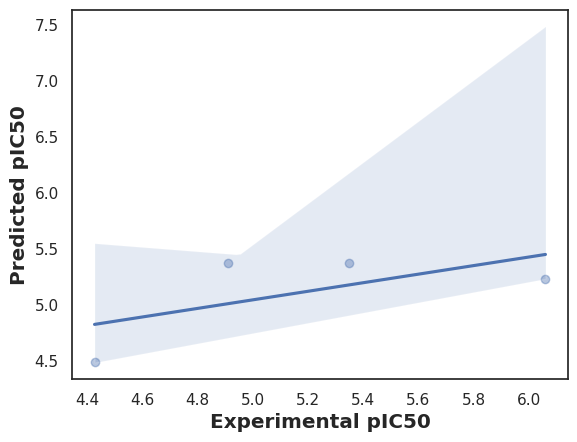

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
plt.show() # It's good practice to include plt.show() to display the plot

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
! pip install lazypredict

     |████████████████████████████████| 302 kB 4.1 MB/s 
     |████████████████████████████████| 98 kB 8.2 MB/s 
     |████████████████████████████████| 255.9 MB 31 kB/s 
     |████████████████████████████████| 24.8 MB 1.3 MB/s 
     |████████████████████████████████| 1.7 MB 32.4 MB/s 
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/pip/_internal/cli/base_command.py", line 186, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/site-packages/pip/_internal/commands/install.py", line 331, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.7/site-packages/pip/_internal/legacy_resolve.py", line 177, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "/usr/local/lib/python3.7/site-packages/pip/_internal/legacy_resolve.py", line 333, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.7/site-pack

In [ ]:
import sys
!{sys.executable} -m pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.3/692.3 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv


--2025-04-26 10:19:08--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-04-26 10:19:08--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [ ]:

df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:

X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [ ]:
# Examine X dimension
X.shape


(18, 881)

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(18, 90)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 5.040800
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 0
[LightGBM] [Info] Start training from score 5.040800
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [ ]:

# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,4.53,-19.89,5.05,0.01
QuantileRegressor,1.17,-0.00,1.11,0.04
ElasticNet,1.17,0.00,1.10,0.01
DummyRegressor,1.17,0.00,1.10,0.01
HistGradientBoostingRegressor,1.17,0.00,1.10,0.04
LassoLars,1.17,0.00,1.10,0.02
Lasso,1.17,0.00,1.10,0.01
LGBMRegressor,1.17,0.00,1.10,0.07
NuSVR,1.15,0.09,1.05,0.01


In [ ]:

# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,3.45,-70.02,5.69,0.02
GaussianProcessRegressor,1.99,-27.80,3.62,0.02
XGBRegressor,1.62,-16.86,2.85,0.06
OrthogonalMatchingPursuit,1.37,-9.65,2.20,0.02
OrthogonalMatchingPursuitCV,1.37,-9.62,2.20,0.03
DecisionTreeRegressor,1.36,-9.48,2.19,0.02
ExtraTreeRegressor,1.36,-9.48,2.19,0.02
ElasticNetCV,1.36,-9.31,2.17,0.67
MLPRegressor,1.30,-7.80,2.00,0.04


[(0.0, 1.0)]

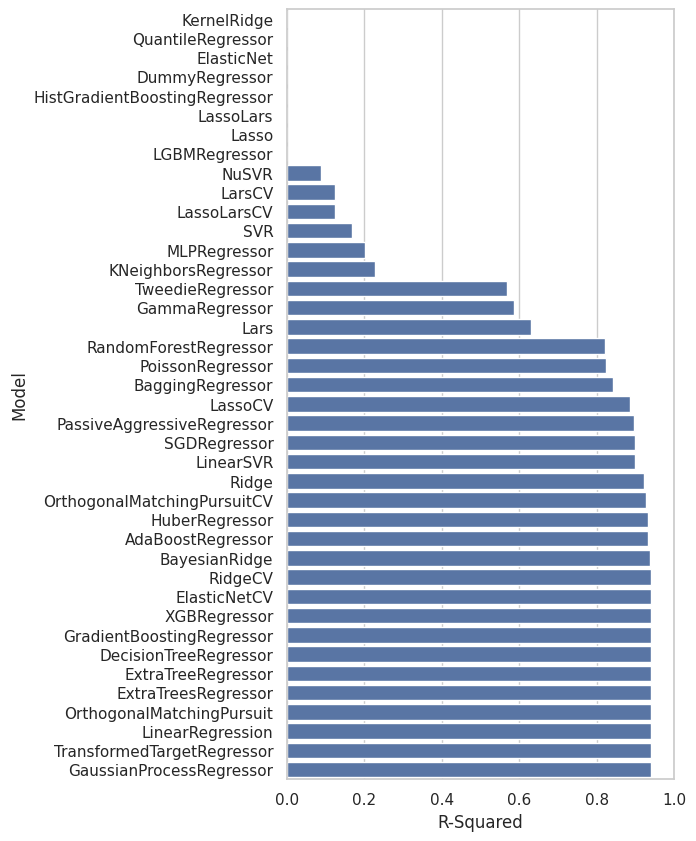

In [ ]:

# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

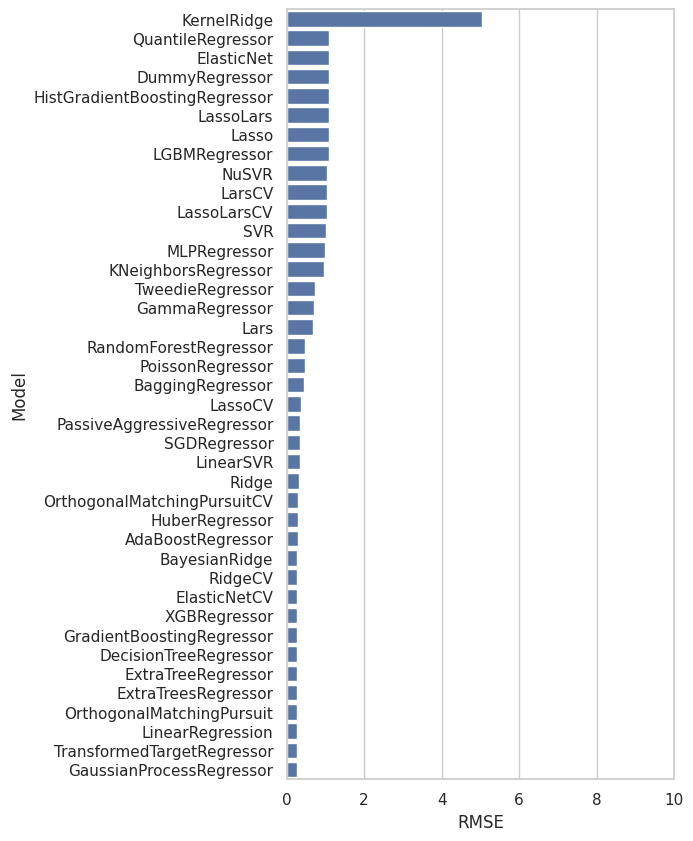

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

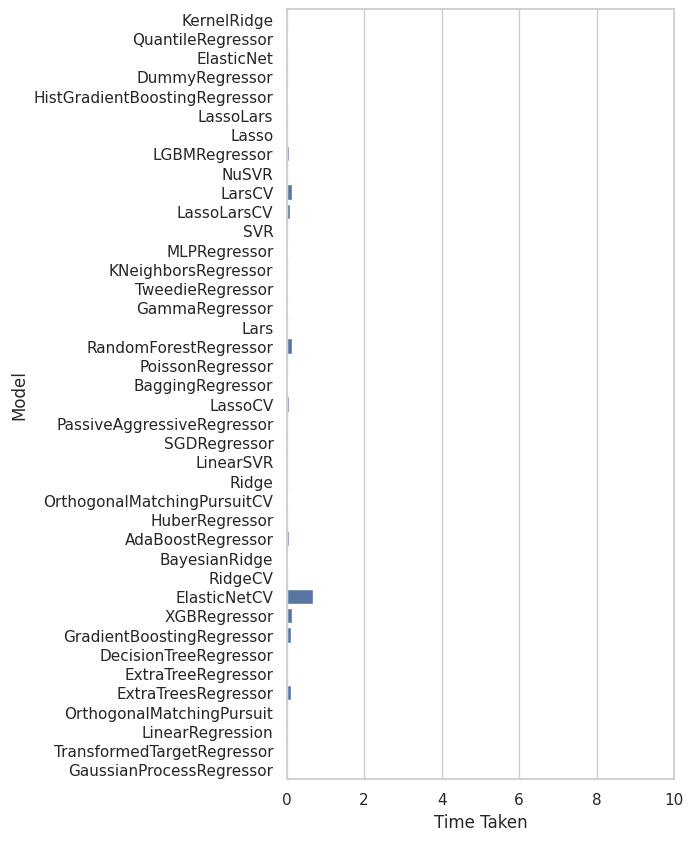

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))